In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import integrate, optimize, stats
from sklearn.metrics import r2_score

In [2]:
def system(t, x, alpha, beta, delta, gamma):
    return np.array([
        alpha * x[0] - beta * x[0] * x[1],
        delta * x[0] * x[1] - gamma * x[1],
    ])

In [3]:
def solver(parameters, t=np.linspace(0, 1, 10)):
    solution = integrate.solve_ivp(
        system, [t.min(), t.max()], y0=parameters[-2:],
        args=parameters[:-2], t_eval=t
    )
    return solution.y

In [77]:
np.random.seed(12345)
p0 = np.array([ 1.1, 0.4, 0.1, 0.4, 1, 1])
texp = np.linspace(0, 1.*12, 300)
xexp = solver(p0, t=texp)
sigma = 0.01 * np.ones_like(xexp) 
xexp += sigma * np.random.normal(size=xexp.shape)

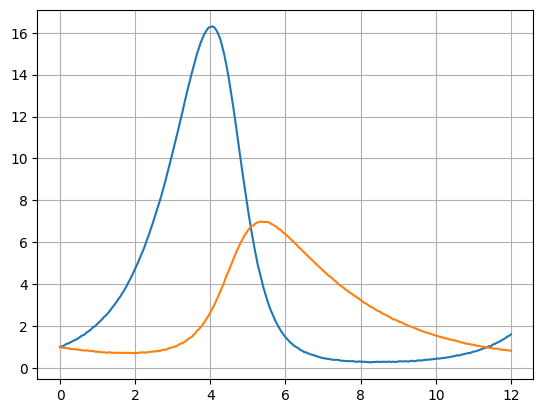

In [78]:
fig, axe = plt.subplots()
axe.plot(texp, xexp.T)
axe.grid()

In [79]:
def loss_factory(t, x, sigma):
    def wrapped(parameters):
        return 0.5 * np.sum(np.power((x - solver(parameters, t=t)) / sigma, 2))
    return wrapped

In [80]:
loss = loss_factory(texp, xexp, sigma)

In [81]:
solution = optimize.minimize(
    loss,
    x0=[1., 0.5, 0.5, 0.5, 1, 1],
    bounds=[(0., 10.)] * 6,
)

In [82]:
solution

      fun: 295.4623486947875
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 12.60443704, -13.67459959,  12.51162303,   3.71953775,
         2.45927935,  -3.32672132])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 525
      nit: 43
     njev: 75
   status: 0
  success: True
        x: array([1.10075596, 0.40021544, 0.09993982, 0.39971448, 0.99926792,
       1.00091765])

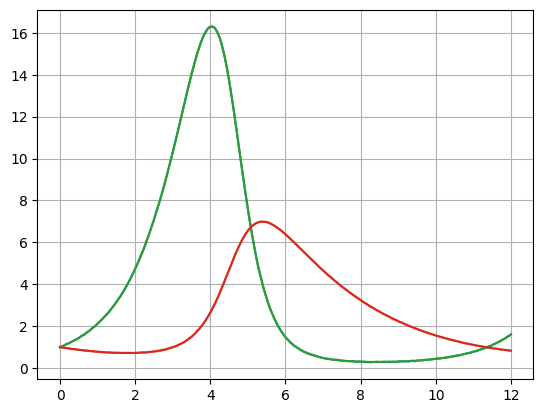

In [83]:
fig, axe = plt.subplots()
axe.plot(texp, xexp.T)
axe.plot(texp, solver(solution.x, t=texp).T)
axe.grid()